### IMPORTS
For data cleaning and handling.

In [29]:
import numpy as np
import pandas as pd
import sys

sys.path.insert (1, '/Users/mbp/Documents/IRONHACK/04.Classes/projects/ETL_250_Best_Movies/04.src/cleaning.py')

from cleaning import check_nan

In [30]:
oscars = pd.read_csv('../02.data_csv/oscars_df.csv')

In [31]:
oscarsdf = pd.DataFrame(oscars)

In [32]:
oscars = oscarsdf.copy()

In [33]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [34]:
oscars.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,571.0,285.000000,1.649778e+02,0.0,142.5,285.0,427.5,570.0
Year of Release,571.0,1973.357268,2.931574e+01,1927.0,1944.0,1972.0,2001.0,2021.0
Movie Time,571.0,124.894921,2.632282e+01,66.0,107.0,121.0,136.5,238.0
IMDB Rating,571.0,7.570403,5.596518e-01,5.6,7.3,7.6,7.9,9.3
Tomatometer Rating,439.0,87.503417,1.169062e+01,29.0,84.0,91.0,95.0,100.0
Tomatometer Count,439.0,110.697039,1.195414e+02,5.0,25.0,54.0,199.0,574.0
Audience Rating,439.0,82.428246,1.092790e+01,21.0,78.0,85.0,90.0,98.0
Audience Count,439.0,515414.455581,3.623107e+06,6.0,6637.5,37166.0,125536.5,35797635.0
Tomatometer Top Critics Count,439.0,21.861048,2.161549e+01,0.0,5.0,11.0,45.0,69.0
Tomatometer Fresh Critics Count,439.0,98.471526,1.077986e+02,3.0,21.5,49.0,163.5,495.0


In [35]:
oscars = oscars.drop(['Unnamed: 0','Movie Info','Film ID'], axis=1)

In [36]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              571 non-null    object 
 1   Oscar Year                        571 non-null    object 
 2   Film Studio/Producer(s)           571 non-null    object 
 3   Award                             571 non-null    object 
 4   Year of Release                   571 non-null    int64  
 5   Movie Time                        571 non-null    int64  
 6   Movie Genre                       571 non-null    object 
 7   IMDB Rating                       571 non-null    float64
 8   IMDB Votes                        571 non-null    object 
 9   Genres                            439 non-null    object 
 10  Critic Consensus                  339 non-null    object 
 11  Content Rating                    439 non-null    object 
 12  Director

N nan cols: 18
Genres                              23.117338
Critic Consensus                    40.630473
Content Rating                      23.117338
Directors                           23.467601
Authors                             23.467601
Actors                              23.117338
Original Release Date               23.117338
Streaming Release Date              23.292469
Production Company                  23.117338
Tomatometer Status                  23.117338
Tomatometer Rating                  23.117338
Tomatometer Count                   23.117338
Audience Status                     23.642732
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Top Critics Count       23.117338
Tomatometer Fresh Critics Count     23.117338
Tomatometer Rotten Critics Count    23.117338
dtype: float64


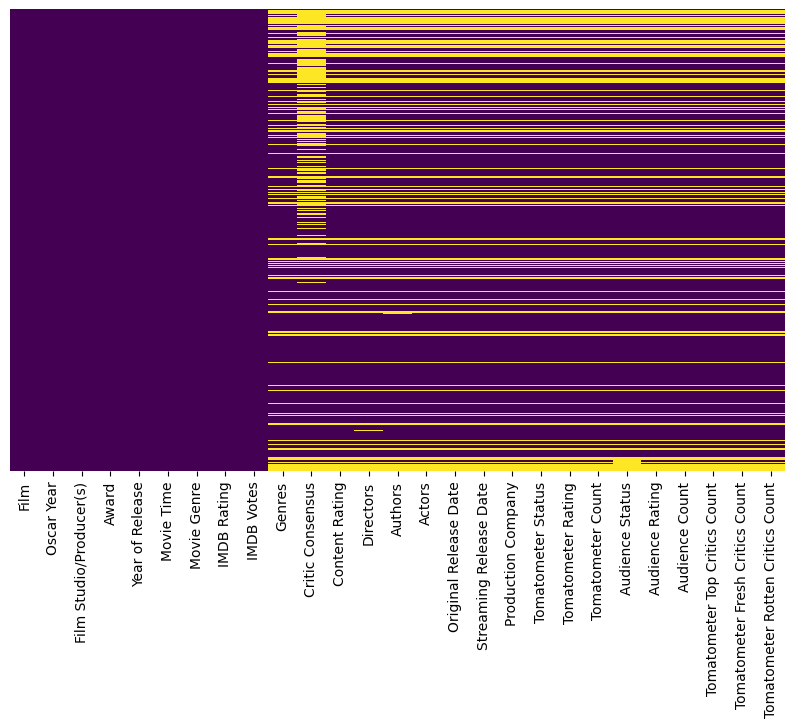

In [37]:
check_nan(oscars)

In [41]:
Oscars = oscars.rename(columns={'Film': 'Title'})

In [44]:
IMDB = pd.read_csv('../02.data_csv/IMDB.csv')

In [45]:
IMDB = pd.DataFrame(IMDB)

In [46]:
inner_join = pd.merge(IMDB, Oscars, on='Title', how='inner')


In [47]:
inner_join

,Unnamed: 0,Title,Release Year,Length,Parental,Director,Cast,IMDB rating,Plot,Image URL,...,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,0,The Shawshank Redemption,1994,2h 22m,R,Frank Darabont,"Tim Robbins , Andy Dufresne , Morgan Freeman ,...",9.3/10,"Over the course of several years, two convicts...",https://m.media-amazon.com/images/M/MV5BNDE3OD...,...,Columbia Pictures,Certified-Fresh,91.0,75.0,Upright,98.0,886485.0,19.0,68.0,7.0
1,1,The Godfather,1972,2h 55m,R,Francis Ford Coppola,"Marlon Brando , Don Vito Corleone , Al Pacino ...",9.2/10,"Don Vito Corleone, head of a mafia family, dec...",https://m.media-amazon.com/images/M/MV5BM2MyNj...,...,Paramount Pictures,Certified-Fresh,98.0,99.0,Upright,98.0,733939.0,24.0,97.0,2.0
2,3,The Godfather Part II,1974,3h 22m,R,Francis Ford Coppola,"Al Pacino , Michael , Robert De Niro , Vito Co...",9.0/10,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12 Angry Men,1957,1h 36m,Approved,Sidney Lumet,"Henry Fonda , Juror 8 , Lee J. Cobb , Juror 3 ...",9.0/10,The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Schindler's List,1993,3h 15m,R,Steven Spielberg,"Liam Neeson , Oskar Schindler , Ralph Fiennes ...",9.0/10,"In German-occupied Poland during World War II,...",https://m.media-amazon.com/images/M/MV5BNDE4OT...,...,Universal Pictures,Certified-Fresh,97.0,100.0,Upright,97.0,411608.0,24.0,97.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,234,The Grapes of Wrath,1940,2h 9m,Passed,John Ford,"Henry Fonda , Tom Joad , Jane Darwell , Ma Joa...",8.1/10,"An Oklahoma family, driven off their farm by t...",https://m.media-amazon.com/images/M/MV5BNzJiOG...,...,20th Century Fox Film Corporation,Certified-Fresh,100.0,48.0,Upright,88.0,24311.0,7.0,48.0,0.0
89,238,Rebecca,1940,2h 10m,Approved,Alfred Hitchcock,"Laurence Olivier , 'Maxim' de Winter , Joan Fo...",8.1/10,A self-conscious woman juggles adjusting to he...,https://m.media-amazon.com/images/M/MV5BYTcxYW...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,239,The Sound of Music,1965,2h 52m,G,Robert Wise,"Julie Andrews , Maria , Christopher Plummer , ...",8.1/10,A young novice is sent by her convent in 1930s...,https://m.media-amazon.com/images/M/MV5BNWFhNj...,...,20th Century-Fox,Certified-Fresh,83.0,71.0,Upright,91.0,606397.0,14.0,59.0,12.0
91,243,It Happened One Night,1934,1h 45m,Passed,Frank Capra,"Clark Gable , Peter Warne , Claudette Colbert ...",8.1/10,A renegade reporter trailing a young runaway h...,https://m.media-amazon.com/images/M/MV5BYzJmMW...,...,Sony Pictures Home Entertainment,Certified-Fresh,98.0,60.0,Upright,93.0,33678.0,15.0,59.0,1.0


N nan cols: 18
Genres                              13.978495
Critic Consensus                    15.053763
Content Rating                      13.978495
Directors                           15.053763
Authors                             13.978495
Actors                              13.978495
Original Release Date               13.978495
Streaming Release Date              13.978495
Production Company                  13.978495
Tomatometer Status                  13.978495
Tomatometer Rating                  13.978495
Tomatometer Count                   13.978495
Audience Status                     15.053763
Audience Rating                     13.978495
Audience Count                      13.978495
Tomatometer Top Critics Count       13.978495
Tomatometer Fresh Critics Count     13.978495
Tomatometer Rotten Critics Count    13.978495
dtype: float64


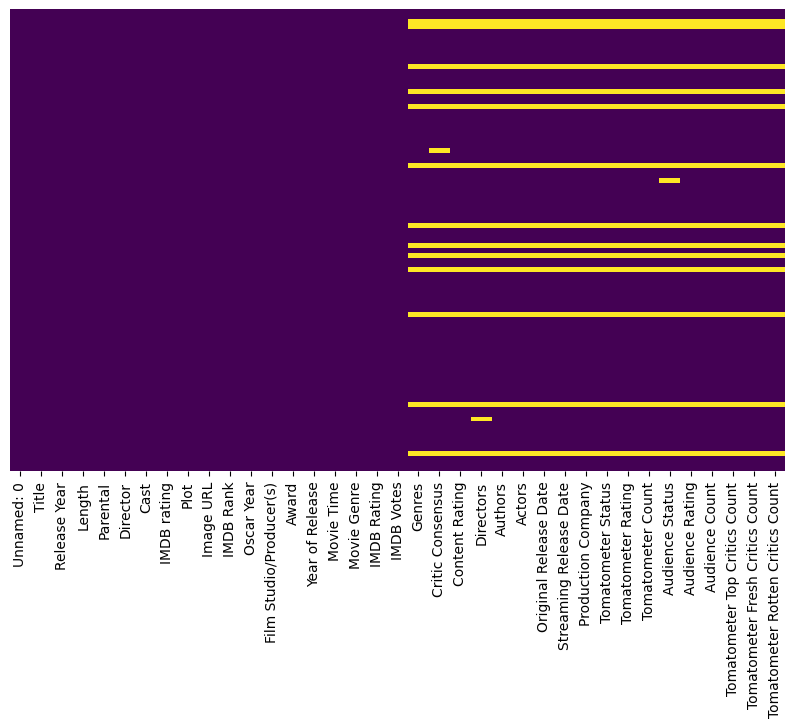

In [48]:
check_nan(inner_join)